In [349]:
from google.colab import drive
import numpy as np
import pandas as pd
from scipy import stats
drive.mount('/content/drive')
header = ['title', 'address', 'unit_type', 'price', 'bedrooms', 'bathrooms', 'apartment_lat', 'apartment_lon', 'hydro_included', 'heat_included', 'water_included', 'laundry_included', 'backyard_included', 'parking_included', 'gym_included', 'sqft', 'furnished', 'air_conditioning', 'walk_score', 'transit_score', 'bike_score', 'img_1', 'img_2', 'img_3']
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/scraped_ads.csv", names=header, index_col=False)
df = df[1:]
df = df[["price", "bedrooms", "apartment_lat", "apartment_lon"]]

# to numeric
df["price"] = pd.to_numeric(df.price)
df["bedrooms"] = pd.to_numeric(df.bedrooms)
df["apartment_lat"] = pd.to_numeric(df.apartment_lat)
df["apartment_lon"] = pd.to_numeric(df.apartment_lon)

# get rid of outliers for apartment_lat, apartment_lon, sqft
for index, row in df.iterrows():
    if(row['apartment_lat'] > 45):
      df.at[index, "apartment_lat"] = pd.NA
    if(row['apartment_lat'] < 43):
      df.at[index, "apartment_lat"] = pd.NA
    if(row['apartment_lon'] > -75):
      df.at[index, "apartment_lon"] = pd.NA
    if(row['apartment_lon'] < -80):
      df.at[index, "apartment_lon"] = pd.NA

df = df.dropna()

# normalize
#df["price"] = (df["price"] - df["price"].min()) /(df["price"].max() - df["price"].min()) # normalize price
df["bedrooms"] = (df["bedrooms"] - df["bedrooms"].min()) /(df["bedrooms"].max() - df["bedrooms"].min()) # normalize bedrooms
df["apartment_lat"] = (df["apartment_lat"] - df["apartment_lat"].min()) /(df["apartment_lat"].max() - df["apartment_lat"].min()) # normalize apartment_lat
df["apartment_lon"] = (df["apartment_lon"] - df["apartment_lon"].min()) /(df["apartment_lon"].max() - df["apartment_lon"].min()) # normalize apartment_lon
print(df)
datanp = df.values.astype(np.float32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       price  bedrooms apartment_lat apartment_lon
1    1350.00     0.000      0.365914      0.715935
2    1100.00     0.000      0.481697      0.959218
3    1292.00     0.000      0.364908      0.723007
4    5600.00     1.000      0.366681      0.670288
5    2100.00     0.250      0.353481      0.671172
6     799.00     0.500      0.410948      0.793884
7    3497.00     0.625      0.340085      0.703312
8    2497.00     0.375      0.340085      0.703312
9    2057.00     0.125      0.340085      0.703312
10   2054.00     0.000      0.468122       0.61879
11   2100.00     0.250      0.366074      0.658746
12   2059.00     0.000      0.194816      0.225517
13   2079.00     0.000      0.438207      0.960341
14   2100.00     0.250      0.344183      0.666249
15   2094.00     0.000      0.476959      0.699455
16   2069.00     0.000      0.407677      0.751111
17  

In [350]:
np.random.seed(50)
np.random.shuffle(datanp)

train_index = int(datanp.shape[0] * 0.7)

train_set = datanp[:train_index]
val_set = datanp[train_index:]

In [351]:
import csv
import random
import torch
import torch.utils.data

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

import os
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [352]:
x_train = train_set[:,-3:]
y_train = train_set[:,0]
x_valid = val_set[:,-3:]
y_valid = val_set[:,0]

In [353]:
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [354]:
inputDim = 3        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 1e-4
epochs = 100000

model = linearRegression(inputDim, outputDim)

In [355]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [356]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()
    # get output from the model, given the inputs
    outputs = model(inputs)
    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()
    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([507])) that is different to the input size (torch.Size([507, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.
epoch 97500, loss 461230.6875
tensor(461230.5938, grad_fn=<MseLossBackward>)
epoch 97501, loss 461230.59375
tensor(461230.5938, grad_fn=<MseLossBackward>)
epoch 97502, loss 461230.59375
tensor(461230.5625, grad_fn=<MseLossBackward>)
epoch 97503, loss 461230.5625
tensor(461230.5625, grad_fn=<MseLossBackward>)
epoch 97504, loss 461230.5625
tensor(461230.4688, grad_fn=<MseLossBackward>)
epoch 97505, loss 461230.46875
tensor(461230.4375, grad_fn=<MseLossBackward>)
epoch 97506, loss 461230.4375
tensor(461230.3750, grad_fn=<MseLossBackward>)
epoch 97507, loss 461230.375
tensor(461230.3438, grad_fn=<MseLossBackward>)
epoch 97508, loss 461230.34375
tensor(461230.2812, grad_fn=<MseLossBackward>)
epoch 97509, loss 461230.28125
tensor(461230.2812, grad_fn=<MseLossBackward>)
epoch 97510, loss 461230.28125
tensor(461230.2500, grad_fn=<MseLossBackward>)
epoch 97511, loss 461230.25
tensor(461230.1875, grad_fn=<MseLossBackward>)
epoch 97512, loss 4612

0 Predicted:  2000.9645 Actual:  850.0
1 Predicted:  1812.9478 Actual:  2599.0
2 Predicted:  1912.7268 Actual:  899.0
3 Predicted:  1983.6017 Actual:  1779.0
4 Predicted:  1983.6017 Actual:  1779.0
5 Predicted:  2027.0486 Actual:  2769.0
6 Predicted:  1968.5898 Actual:  1995.0
7 Predicted:  2200.1091 Actual:  1100.0
8 Predicted:  2228.542 Actual:  1800.0
9 Predicted:  1980.5498 Actual:  1850.0
10 Predicted:  1978.9983 Actual:  1550.0
11 Predicted:  1988.2451 Actual:  1609.0
12 Predicted:  1910.0392 Actual:  1418.0
13 Predicted:  1825.3737 Actual:  1735.0
14 Predicted:  1974.4503 Actual:  2245.0
15 Predicted:  1925.719 Actual:  1500.0
16 Predicted:  2014.4845 Actual:  2720.0
17 Predicted:  2074.6758 Actual:  1950.0
18 Predicted:  2055.9092 Actual:  1550.0
19 Predicted:  1954.2341 Actual:  2000.0
20 Predicted:  1830.586 Actual:  1650.0
21 Predicted:  1868.6067 Actual:  1400.0
22 Predicted:  1974.4503 Actual:  1995.0
23 Predicted:  1958.7256 Actual:  2900.0
24 Predicted:  2026.7256 Actual

<Figure size 432x288 with 0 Axes>

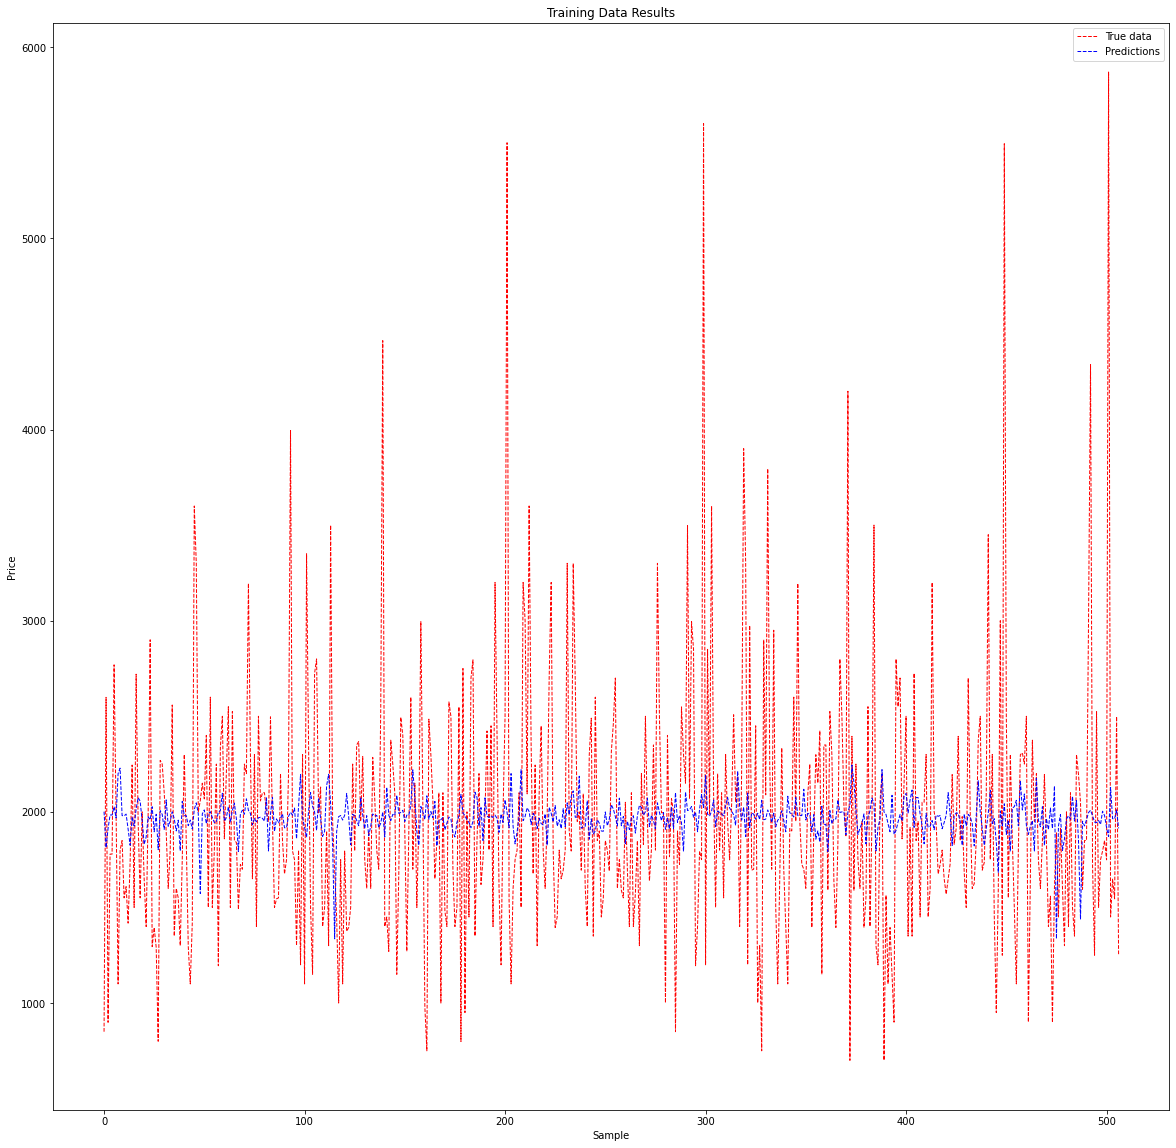

In [366]:
# difference between training price and predicted price

with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

for i in range(len(y_train)):
  print(i, "Predicted: ", predicted[i][0], "Actual: ", y_train[i])

x_index = list(range(0, len(y_train)))

plt.clf()
plt.figure(figsize=(20,20))
plt.plot(x_index, y_train, 'r--', label='True data', linewidth=1.0)
plt.plot(x_index, predicted, 'b--', label='Predictions', linewidth=1.0)
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('Price') 
plt.title('Training Data Results')
plt.show()

0 Predicted:  1986.8306 Actual:  2250.0
1 Predicted:  1949.8442 Actual:  1650.0
2 Predicted:  1988.668 Actual:  1500.0
3 Predicted:  1897.8778 Actual:  1500.0
4 Predicted:  1977.5734 Actual:  1985.0
5 Predicted:  1335.8658 Actual:  1890.0
6 Predicted:  1371.1052 Actual:  2350.0
7 Predicted:  2032.5874 Actual:  2995.0
8 Predicted:  2138.7822 Actual:  1000.0
9 Predicted:  2079.537 Actual:  1250.0
10 Predicted:  1922.9122 Actual:  1400.0
11 Predicted:  1990.7021 Actual:  2850.0
12 Predicted:  2085.9426 Actual:  2390.0
13 Predicted:  2038.3433 Actual:  3500.0
14 Predicted:  1959.8981 Actual:  1400.0
15 Predicted:  1849.0446 Actual:  1749.0
16 Predicted:  1957.9149 Actual:  2000.0
17 Predicted:  1985.3097 Actual:  1590.0
18 Predicted:  1992.1682 Actual:  1825.0
19 Predicted:  1975.3232 Actual:  1975.0
20 Predicted:  2074.6758 Actual:  1950.0
21 Predicted:  1999.6039 Actual:  1195.0
22 Predicted:  2035.3431 Actual:  2600.0
23 Predicted:  2071.36 Actual:  2600.0
24 Predicted:  1962.9586 Actua

<Figure size 432x288 with 0 Axes>

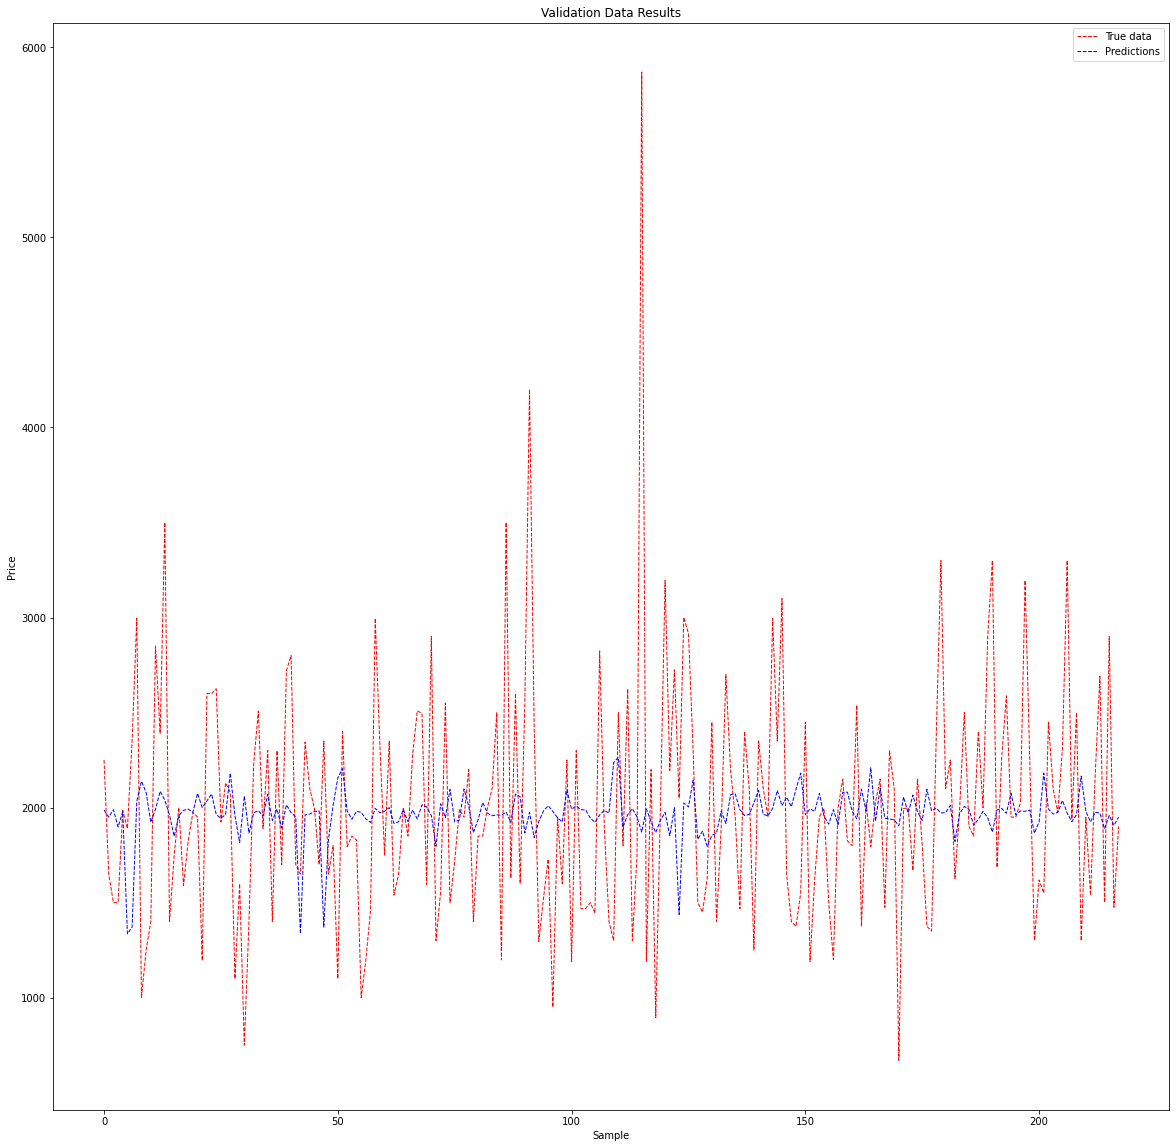

In [365]:
training_inputs = Variable(torch.from_numpy(x_valid))

with torch.no_grad(): # we don't need gradients in the testing phase
    predicted_s = model(Variable(torch.from_numpy(x_valid))).data.numpy()

for i in range(len(y_valid)):
  print(i, "Predicted: ", predicted_s[i][0], "Actual: ", y_valid[i])

x_index = list(range(0, len(y_valid)))

plt.clf()
plt.figure(figsize=(20,20))
plt.plot(x_index, y_valid, 'r--', label='True data', linewidth=1.0)
plt.plot(x_index, predicted_s, 'b--', label='Predictions', linewidth=1.0)
plt.legend(loc='best')
plt.xlabel('Sample')
plt.ylabel('Price') 
plt.title('Validation Data Results')
plt.show()

0 Predicted:  1986.8306 Actual:  2250.0 263.16943
1 Predicted:  1949.8442 Actual:  1650.0 299.84424
2 Predicted:  1988.668 Actual:  1500.0 488.66797
3 Predicted:  1897.8778 Actual:  1500.0 397.8778
4 Predicted:  1977.5734 Actual:  1985.0 7.4266357
5 Predicted:  1335.8658 Actual:  1890.0 554.13416
6 Predicted:  1371.1052 Actual:  2350.0 978.8948
7 Predicted:  2032.5874 Actual:  2995.0 962.4126
8 Predicted:  2138.7822 Actual:  1000.0 1138.7822
9 Predicted:  2079.537 Actual:  1250.0 829.5371
10 Predicted:  1922.9122 Actual:  1400.0 522.91223
11 Predicted:  1990.7021 Actual:  2850.0 859.29785
12 Predicted:  2085.9426 Actual:  2390.0 304.05737
13 Predicted:  2038.3433 Actual:  3500.0 1461.6567
14 Predicted:  1959.8981 Actual:  1400.0 559.8981
15 Predicted:  1849.0446 Actual:  1749.0 100.044556
16 Predicted:  1957.9149 Actual:  2000.0 42.085083
17 Predicted:  1985.3097 Actual:  1590.0 395.3097
18 Predicted:  1992.1682 Actual:  1825.0 167.16821
19 Predicted:  1975.3232 Actual:  1975.0 0.32324

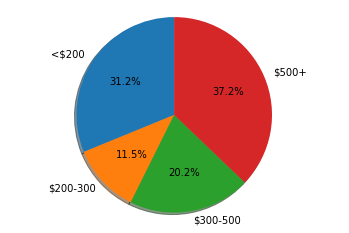

In [373]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '<$200', '$200-300', '$300-500', '$500+'
sizes = [0, 0, 0, 0]

for i in range(len(y_valid)):
  dif = abs(predicted_s[i][0] - y_valid[i])
  print(i, "Predicted: ", predicted_s[i][0], "Actual: ", y_valid[i], dif)
  if(dif<200):
    sizes[0] += 1
  elif(dif<300):
    sizes[1] += 1
  elif(dif<500):
    sizes[2] += 1
  else:
    sizes[3] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()